(100, 5)
4/4 [==============================] - 0s 3ms/step
[[-1.3198357   2.2551453 ]
 [-0.770517    1.4797543 ]
 [ 0.5086477  -0.05152538]
 [-1.758417    1.0783124 ]
 [-1.2340267   3.2977076 ]
 [-0.20531803  0.71912926]
 [-1.4216689   2.226908  ]
 [-0.5814333   0.9955851 ]
 [-1.6949406   1.2788904 ]
 [-3.0280786   2.6980588 ]
 [-1.3742348   1.2167431 ]
 [-2.3399653   1.8566982 ]
 [-2.1457117   2.1606705 ]
 [-2.6616087   1.9349211 ]
 [ 0.7276392   1.8000531 ]
 [-0.2567073   1.0841001 ]
 [-2.1286566   2.8712046 ]
 [-1.0174062   0.5490551 ]
 [-1.4363657   2.2006564 ]
 [-1.5963672   1.0842847 ]
 [-3.4314904   3.2831278 ]
 [-1.5896959   3.2743888 ]
 [-2.4708164   2.7166812 ]
 [-1.4990482   1.4585818 ]
 [-0.69048774  2.982851  ]
 [-1.8817297   2.0738592 ]
 [-0.17608982  0.89650714]
 [-2.0969121   3.588811  ]
 [-0.54231125  0.44129184]
 [ 0.15347642  2.7342865 ]
 [-0.97664624  1.9334983 ]
 [-1.6470706   2.2081242 ]
 [ 0.08380738  0.4287547 ]
 [-1.9112477   3.1555028 ]
 [-0.27157894  1.06932

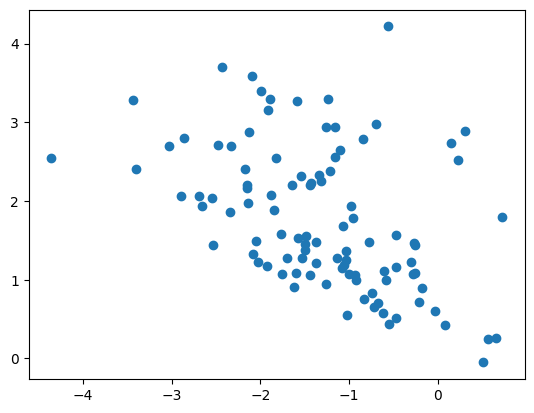

In [5]:

# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	print(x_input.shape)
	return x_input

# use the generator to generate n fake examples and plot the results
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	print(X)
	# plot the results
	pyplot.scatter(X[:, 0], X[:, 1])
	pyplot.show()

# size of the latent space
latent_dim = 5
# define the discriminator model
model = define_generator(latent_dim)
# generate and plot generated samples
generate_fake_samples(model, latent_dim, 100)

In [1]:
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
import numpy as np
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense,Input,Conv1D,LSTM,LeakyReLU,Permute,UpSampling1D,Bidirectional,MaxPool1D,Flatten
from matplotlib import pyplot
import pickle

2022-12-27 21:34:00.820569: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-27 21:34:01.175290: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-27 21:34:01.175869: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-27 21:34:01.285909: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-27 21:34:03.425961: W tensorflow/stream_executor/platform/de

In [4]:
arr = np.random.randint(low=140, high=180, size = 8)
arr

array([144, 179, 140, 157, 162, 159, 174, 179])

In [31]:
# train a generative adversarial network on a one-dimensional function


# define the standalone discriminator model
"""
	model = Sequential()
	model.add(Dense(30, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	
	model.add(Dense(4, activation='softmax'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
	"""
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Input(shape=n_inputs))
	model.add(Permute((2)))

	model.add(Conv1D(filters=32, kernel_size=16, strides=1, padding='same'))
	model.add(LeakyReLU())

	# model.add(Dropout(0.4))

	model.add(Conv1D(filters=64, kernel_size=16, strides=1, padding='same'))
	model.add(LeakyReLU())

	model.add(MaxPool1D(pool_size=2))

	model.add(Conv1D(filters=128, kernel_size=16, strides=1, padding='same'))
	model.add(LeakyReLU())

	# model.add(Dropout(0.4))

	model.add(Conv1D(filters=256, kernel_size=16, strides=1, padding='same'))
	model.add(LeakyReLU())

	model.add(MaxPool1D(pool_size=2))

	model.add(Flatten())
	model.add(Dense(1))

	return model
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Input(shape=latent_dim))
	model.add(Bidirectional(LSTM(64, return_sequences=True)))
	model.add(Conv1D(filters=128, kernel_size=16, strides=1, padding='same'))
	model.add(LeakyReLU())
	model.add(Conv1D(filters=64, kernel_size=16, strides=1, padding='same'))
	model.add(LeakyReLU())
	model.add(UpSampling1D(2))

	model.add(Conv1D(filters=32, kernel_size=16, strides=1, padding='same'))
	model.add(LeakyReLU())

	model.add(Conv1D(filters=16, kernel_size=16, strides=1, padding='same'))
	model.add(LeakyReLU())

	model.add(UpSampling1D(2))

	model.add(Conv1D(filters=1, kernel_size=16, strides=1, padding='same', activation='tanh'))

	model.add(Permute((2)))
	return model
	

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	#X1 = rand(n) 
	X1=np.random.randint(low=140, high=180, size = n)
	#print("X1",X1)
	# generate outputs X^2
	X2 = X1 * X1
	#print("X2:",X2)
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	#print("X:",X)
	#print(X.shape)
	# generate class labels
	y = ones((n, 4))
	#print("y:",y)
	#print(y)
	return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	#x_input = randn(latent_dim * n)
	x_input=np.random.randint(low=140, high=180, size =latent_dim*n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n, 4))
	return X, y

# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()

# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=1000, n_batch=128, n_eval=2000):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 4))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)
	gan_model.save("gan.h5")
	

# size of the latent space
latent_dim = 2
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

TypeError: 'int' object is not iterable

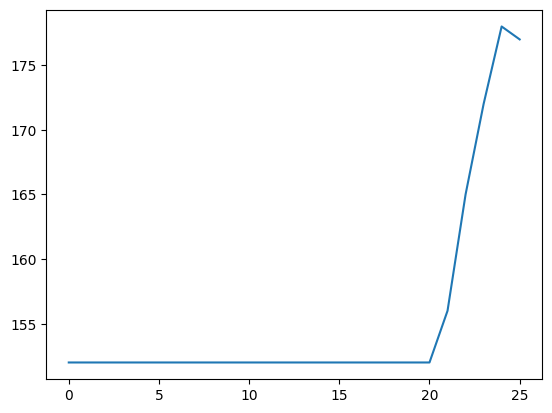

In [7]:
import matplotlib.pyplot as plt
import numpy as np
a=np.array([152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,156,165,172,178,177])
plt.plot(a)
plt.show()

In [26]:
print(a.shape)

(26,)


1/1 [==============================] - 0s 34ms/step
(13, 4)
1/1 [==============================] - 0s 34ms/step
[[7.75032382e-12 9.99999940e-01 4.59581928e-10 3.01196040e-10]
 [7.75032382e-12 9.99999940e-01 4.59581928e-10 3.01196040e-10]
 [7.75032382e-12 9.99999940e-01 4.59581928e-10 3.01196040e-10]
 [7.75032382e-12 9.99999940e-01 4.59581928e-10 3.01196040e-10]
 [7.75032382e-12 9.99999940e-01 4.59581928e-10 3.01196040e-10]
 [7.75032382e-12 9.99999940e-01 4.59581928e-10 3.01196040e-10]
 [7.75032382e-12 9.99999940e-01 4.59581928e-10 3.01196040e-10]
 [7.75032382e-12 9.99999940e-01 4.59581928e-10 3.01196040e-10]
 [7.75032469e-12 1.00000000e+00 4.59581956e-10 3.01196068e-10]
 [7.75032469e-12 1.00000000e+00 4.59581956e-10 3.01196068e-10]
 [1.22868694e-11 1.00000000e+00 5.66315328e-10 4.11626511e-10]
 [2.37160075e-12 1.00000000e+00 1.43226542e-10 9.54911844e-11]
 [1.28905228e-13 1.00000000e+00 2.03965768e-11 9.38329796e-12]]


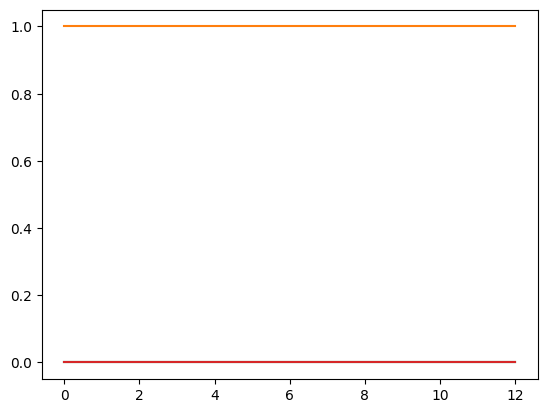

In [8]:
from keras.models import load_model

#print(a.shape)
model = load_model('gan.h5')
#x_input=randn(64*2)
x_input=a.reshape(13,2)
#print(x_input.shape)
#print(x_input[0])
#x=[[1,2],[4,5],[5,6]]
# reshape into a batch of inputs for the network
output=model.predict(x_input)
print(model.predict(x_input).shape)
print(model.predict(x_input))
#plt.plot(x_input)
plt.plot(output)
plt.show()




(1000, 12)


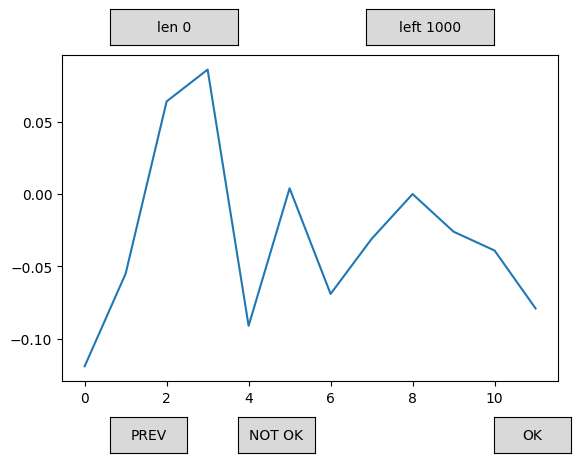

(0,)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button


arr = np.load('./data/00001.npy')

print(arr.shape)
fixed = []
# lead = 4
plt.subplots_adjust(bottom=0.2)
l, = plt.plot(arr[0])

but_len = Button(plt.axes([0.2, 0.9, 0.2, 0.075]), 'len 0')
but_left = Button(plt.axes([0.6, 0.9, 0.2, 0.075]), 'left '+str(arr.shape[0]))


class Index(object):
    ind = 0

    def ok(self, event):
        fixed.append(arr[self.ind])
        self.ind += 1
        but_len.label.set_text('len ' + str(len(fixed)))
        but_left.label.set_text('left ' + str(arr.shape[0]-self.ind))
        l.set_ydata(arr[self.ind])
        plt.draw()

    def not_ok(self, event):
        self.ind += 1
        but_len.label.set_text('len ' + str(len(fixed)))
        but_left.label.set_text('left ' + str(arr.shape[0]-self.ind))
        l.set_ydata(arr[self.ind])
        plt.draw()

    def prev(self, event):
        fixed.pop()
        self.ind -= 1
        but_len.label.set_text('len ' + str(len(fixed)))
        but_left.label.set_text('left ' + str(arr.shape[0]-self.ind))
        l.set_ydata(arr[self.ind])
        plt.draw()


callback = Index()
but_ok = Button(plt.axes([0.80, 0.05, 0.12, 0.075]), 'OK')
but_not_ok = Button(plt.axes([0.40, 0.05, 0.12, 0.075]), 'NOT OK')
but_prev = Button(plt.axes([0.20, 0.05, 0.12, 0.075]), 'PREV')

but_ok.on_clicked(callback.ok)
but_not_ok.on_clicked(callback.not_ok)
but_prev.on_clicked(callback.prev)

plt.show()

res_arr = np.array(fixed)
print(res_arr.shape)

np.save('fixed.npy', res_arr)

In [78]:
import pandas as pd
from keras.backend import clear_session
clear_session()

In [116]:
"""
from glob import glob
data=glob("./data/*")
print(len(data))
print(len(data[:400]))
extract=[]
for i in data[:400]:
    data_read=np.load(i)
    extract.append(data_read)
extract=np.array(extract)
print(extract.shape)
extract=extract.reshape(12000,400)
print(extract.shape)
"""
extract=[]
data=pd.read_csv("data.csv")

for i in data.columns:
    i1=data[i][:400]
    print(i1.shape)
    i1=np.array(i1)
    data1=i1.reshape(1,400)
    print(data1.shape)
    extract.append(data1)
extract=np.array(extract)
print(extract.shape)

(400,)
(1, 400)
(400,)
(1, 400)
(400,)
(1, 400)
(400,)
(1, 400)
(400,)
(1, 400)
(400,)
(1, 400)
(400,)
(1, 400)
(400,)
(1, 400)
(400,)
(1, 400)
(400,)
(1, 400)
(400,)
(1, 400)
(400,)
(1, 400)
(12, 1, 400)


In [126]:
import tensorflow as tf
from keras import layers, regularizers
#from torch_two_sample.statistics_diff import MMDStatistic
#import torch

import matplotlib.pyplot as plt
import numpy as np
import random

from IPython import display
from tqdm import tqdm
from shutil import copyfile


print(tf.__version__)


# from google.colab import drive
# drive.mount('/drive')


norm_value = 10


#################################################################################
#          Helper functions
#################################################################################
def test_show(generator, discriminator):
    noise = tf.random.normal([1, 125, 50])
    generated_ecg = generator(noise, training=False)
    print(generated_ecg.shape)
    plt.plot(generated_ecg[0, 0, :])
    plt.show()
    
    decision = discriminator(generated_ecg, training=False)
    print(decision)
    

def generate_and_save_ecg(model, epoch, test_input, save):
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4,3))
    plt.plot(predictions[0, 0, :] * norm_value)
    # plt.plot(predictions[0, 0, :])
    
    if save:
        plt.savefig('./ecg_at_epoch_{:04d}.png'.format(epoch))

    plt.show()
    

def prepare_data(dim):
#     copyfile(f"/drive/My Drive/Colab Notebooks/data/fix_signals_400.npy", "./fix_signals.npy")

    #data = np.load('./data/00001.npy')
    
    data=np.array(extract)
    print('Data shape:', data.shape)
    #data = np.reshape(data, (data.shape[0], 1, data.shape[1]))
    print('Data shape:', data.shape)

    data = data / norm_value # Normalize
    data = np.array(data, dtype='float32')

    #plt.figure(figsize=(4,3))
    #plt.plot(data[random.randint(0, data.shape[0])][0] * norm_value)
    #plt.show()

    train_size = int(data.shape[0] * 0.9)
    test_size = data.shape[0] - train_size
    print("train_size: ",train_size,"test size: ",test_size)

    # Batch and shuffle the data
    train_dataset = tf.data.Dataset.from_tensor_slices(data[:train_size]).shuffle(train_size).batch(BATCH_SIZE)
    test_dataset  = tf.data.Dataset.from_tensor_slices(data[train_size:]).shuffle(test_size).batch(1)

    seed = tf.random.normal(dim)
    #seed = tf.random.normal(dim)
    print("train_dataset and test_dataset ",train_dataset,test_dataset)
    
    return seed, train_dataset, test_dataset

2.10.0


In [119]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(100, 12)))

    model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))

    model.add(layers.Conv1D(filters=128, kernel_size=16, strides=1, padding='same'))
    model.add(layers.LeakyReLU())
  
    model.add(layers.Conv1D(filters=64, kernel_size=16, strides=1, padding='same'))
    model.add(layers.LeakyReLU())
    
    model.add(layers.UpSampling1D(2))
    
    model.add(layers.Conv1D(filters=32, kernel_size=16, strides=1, padding='same'))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv1D(filters=16, kernel_size=16, strides=1, padding='same'))
    model.add(layers.LeakyReLU())

    model.add(layers.UpSampling1D(2))
    
    model.add(layers.Conv1D(filters=1, kernel_size=16, strides=1, padding='same', activation='tanh'))
    
    model.add(layers.Permute((2, 1)))
    
    return model

In [120]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    clear_session()
    model.add(layers.Input(shape=(1, 400)))
    model.add(layers.Permute((2, 1)))
    
    model.add(layers.Conv1D(filters=32, kernel_size=16, strides=1, padding='same'))
    model.add(layers.LeakyReLU())

    # model.add(layers.Dropout(0.4))

    model.add(layers.Conv1D(filters=64, kernel_size=16, strides=1, padding='same'))
    model.add(layers.LeakyReLU())

    model.add(layers.MaxPool1D(pool_size=2))

    model.add(layers.Conv1D(filters=128, kernel_size=16, strides=1, padding='same'))
    model.add(layers.LeakyReLU())

    # model.add(layers.Dropout(0.4))

    model.add(layers.Conv1D(filters=256, kernel_size=16, strides=1, padding='same'))
    model.add(layers.LeakyReLU())

    model.add(layers.MaxPool1D(pool_size=2))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

generator     = make_generator_model()
discriminator = make_discriminator_model()
    
generator.summary()
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100, 128)         39424     
 l)                                                              
                                                                 
 conv1d_4 (Conv1D)           (None, 100, 128)          262272    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 100, 128)          0         
                                                                 
 conv1d_5 (Conv1D)           (None, 100, 64)           131136    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 100, 64)           0         
                                                                 
 up_sampling1d (UpSampling1D  (None, 200, 64)          0         
 )                                                      

In [121]:
disc_losses = tf.keras.metrics.Mean('disc_loss', dtype=tf.float32)
disc_losses_list = []

fake_disc_accuracy = tf.keras.metrics.BinaryAccuracy('fake_disc_accuracy')
real_disc_accuracy = tf.keras.metrics.BinaryAccuracy('real_disc_accuracy')
fake_disc_accuracy_list, real_disc_accuracy_list = [], []

### generator loss ###
# gen_log_dir = 'logs/gradient_tape/gen_loss'
# gen_summary_writer = tf.summary.create_file_writer(gen_log_dir)
gen_losses = tf.keras.metrics.Mean('gen_loss', dtype=tf.float32)
gen_losses_list = []


#################################################################################
#          Prepare loss functions and optimizers
#################################################################################

# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(0.0002)
discriminator_optimizer = tf.keras.optimizers.Adam(0.0002)


In [122]:
disc_steps = 1

# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(real_ecg, dim):
    noise = tf.random.normal(dim)
    print(noise)
    for i in range(disc_steps):
        with tf.GradientTape() as disc_tape:
            generated_ecg = generator(noise, training=True)
            print(real_ecg,"generated_ecg:",generated_ecg)
            real_output = discriminator(real_ecg, training=True)
            fake_output = discriminator(generated_ecg, training=True)

            disc_loss = discriminator_loss(real_output, fake_output)
        
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
        
        ### for tensorboard ###
        disc_losses.update_state(disc_loss)
        fake_disc_accuracy.update_state(tf.zeros_like(fake_output), fake_output)
        real_disc_accuracy.update_state(tf.ones_like(real_output), real_output)
        #######################
    
    with tf.GradientTape() as gen_tape:
        generated_ecg = generator(noise, training=True)
        fake_output = discriminator(generated_ecg, training=True)

        gen_loss = generator_loss(fake_output)
    
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    ### for tensorboard ###
    gen_losses.update_state(gen_loss)
    #######################
    

def train(dataset, epochs, dim):
    for epoch in tqdm(range(epochs)):
    
        for batch in dataset:
            #print(batch)
            train_step(batch, dim)
            
        disc_losses_list.append(disc_losses.result().numpy())
        gen_losses_list.append(gen_losses.result().numpy())
        
        fake_disc_accuracy_list.append(fake_disc_accuracy.result().numpy())
        real_disc_accuracy_list.append(real_disc_accuracy.result().numpy())
        
        ### for tensorboard ###
#         with disc_summary_writer.as_default():
#             tf.summary.scalar('loss', disc_losses.result(), step=epoch)
#             tf.summary.scalar('fake_accuracy', fake_disc_accuracy.result(), step=epoch)
#             tf.summary.scalar('real_accuracy', real_disc_accuracy.result(), step=epoch)
            
#         with gen_summary_writer.as_default():
#             tf.summary.scalar('loss', gen_losses.result(), step=epoch)
            
        disc_losses.reset_states()        
        gen_losses.reset_states()
        
        fake_disc_accuracy.reset_states()
        real_disc_accuracy.reset_states()
        #######################

        # Save the model every 5 epochs
#         if (epoch + 1) % 5 == 0:
#             generate_and_save_ecg(generator, epochs, seed, False)
#             checkpoint.save(file_prefix = checkpoint_prefix)

    # Generate after the final epoch
    display.clear_output(wait=True)
    generate_and_save_ecg(generator, epochs, seed, False)
    

In [127]:
BATCH_SIZE = 10
noise_dim = [BATCH_SIZE, 100, 12]

seed, train_dataset, test_dataset = prepare_data(noise_dim)

Data shape: (12, 1, 400)
Data shape: (12, 1, 400)
train_size:  10 test size:  2
train_dataset and test_dataset  <BatchDataset element_spec=TensorSpec(shape=(None, 1, 400), dtype=tf.float32, name=None)> <BatchDataset element_spec=TensorSpec(shape=(None, 1, 400), dtype=tf.float32, name=None)>


In [128]:
print(train_dataset,noise_dim)

<BatchDataset element_spec=TensorSpec(shape=(None, 1, 400), dtype=tf.float32, name=None)> [10, 100, 12]


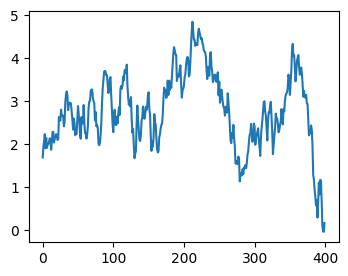

In [129]:
train(train_dataset, 5, noise_dim)

(1, 400)


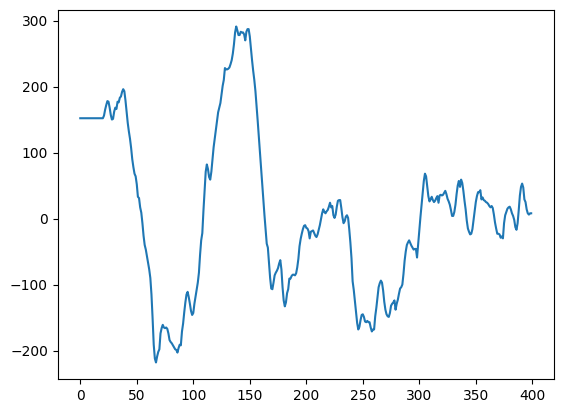

In [139]:
print(extract[0].shape)
es=extract[0]
es=np.array(es)
es1=es.copy()
es=es.reshape(400,1)
plt.plot(es)
plt.show()


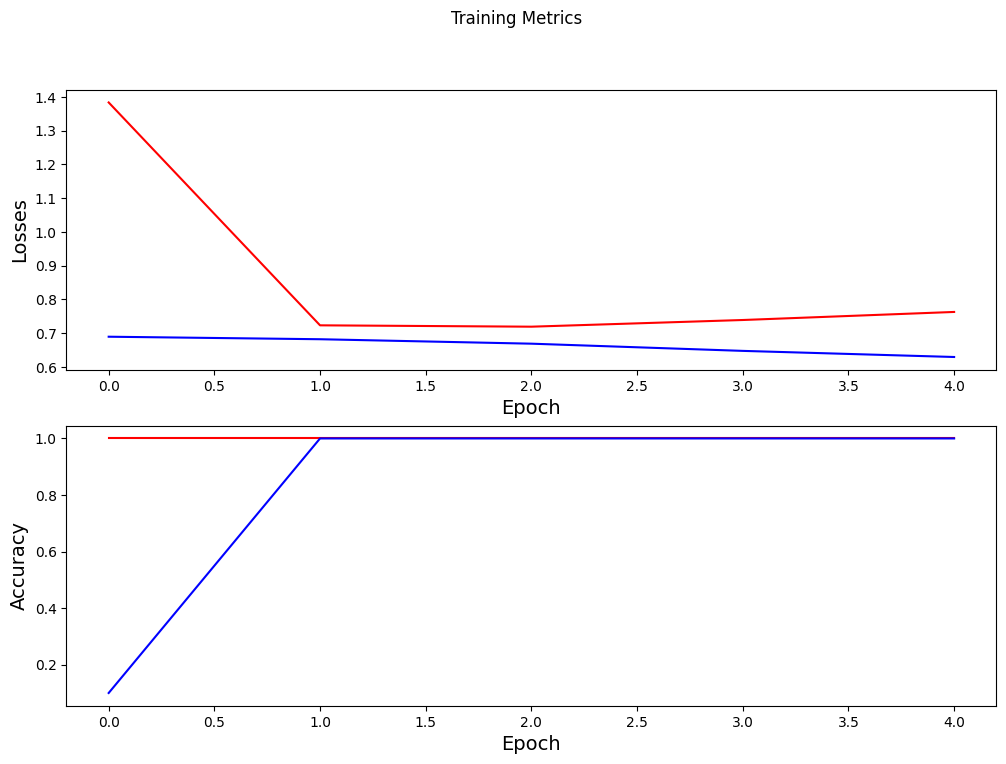

In [135]:
fig, axes = plt.subplots(2, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Losses", fontsize=14)
axes[0].set_xlabel("Epoch", fontsize=14)
axes[0].plot(disc_losses_list, color='red')
axes[0].plot(gen_losses_list, color='blue')

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(fake_disc_accuracy_list, color='red')
axes[1].plot(real_disc_accuracy_list, color='blue')
plt.show()

In [136]:
generator.save("generator_lstm.h5")
discriminator.save("discriminator_lstm.h5")

In [137]:
from keras.models import load_model
gen=load_model("generator_lstm.h5")


(1, 100, 12)


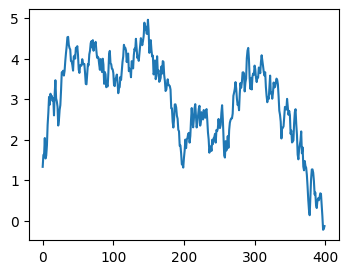

In [156]:
seed = tf.random.normal([1, 100, 12])
print(seed.shape)
ecg = gen(seed, training=False)
fig = plt.figure(figsize=(4,3))
plt.plot(ecg[0, 0, :] * norm_value)
plt.show()
